【課題1】練習のために特徴量とカテゴリを選択<br>
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。<br>
① virgicolorとvirginica<br>
② sepal_lengthとpetal_length<br>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import seaborn as sns


# Speciesの値によるirisの種類
# 0 : Iris setosa
# 1 : Iris virgicolor
# 2 : Iris virginica

# irisのデータセットを読み込む
data = load_iris()

# 読み込んだデータセットをdataframeへ置き換える
p_data_x = pd.DataFrame(data.data)
p_data_y = pd.DataFrame(data.target)

# dataframeを結合し、カラム名を設定する
df_default = pd.concat([p_data_x, p_data_y],axis=1)
df_default = df_default.set_axis(["sepal_length","sepal_width","petal_length","petal_width","Species"], axis="columns")

# 今回使用しないカラムと行を削除
df_d_column = df_default.drop(["sepal_width","petal_width"], axis=1)
df_d_index = df_d_column.index[p_data_y[0] == 0]
df = df_d_column.drop(df_d_index)

# indexを振りなおす
df = df.reset_index(drop="True")
print(df)

    sepal_length  petal_length  Species
0            7.0           4.7        1
1            6.4           4.5        1
2            6.9           4.9        1
3            5.5           4.0        1
4            6.5           4.6        1
..           ...           ...      ...
95           6.7           5.2        2
96           6.3           5.0        2
97           6.5           5.2        2
98           6.2           5.4        2
99           5.9           5.1        2

[100 rows x 3 columns]


【問題2】データの分析<br>
　まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。<br>
　ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。<br>

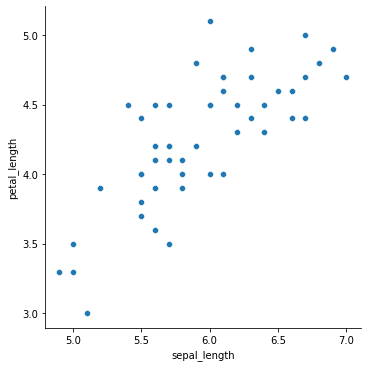

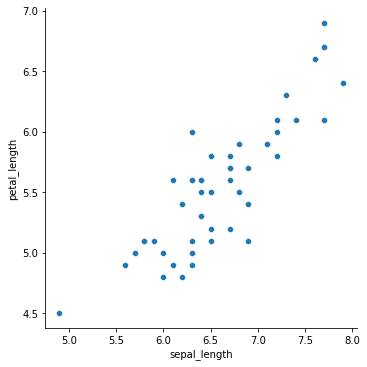

In [2]:
# 作成したデータフレーム(df)からSpeciesの値ごとにデータを分割
df_virgicolor = df.query("Species == 1").drop("Species", axis=1)
df_virginica = df.query("Species == 2").drop("Species", axis=1)

# 散布図を表示
# sns.pairplot(data=df_virgicolor)
sns.relplot(x="sepal_length", y="petal_length", data=df_virgicolor)
sns.relplot(x="sepal_length", y="petal_length", data=df_virginica)

<AxesSubplot:>

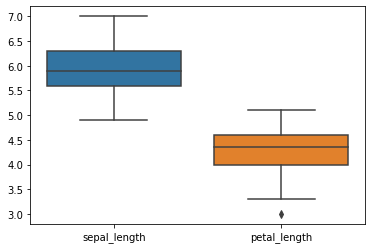

In [3]:
# 箱ひげ図を表示
sns.boxplot(data=df_virgicolor)

<AxesSubplot:>

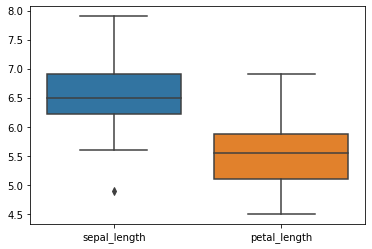

In [4]:
# 箱ひげ図を表示
sns.boxplot(data=df_virginica)

<AxesSubplot:>

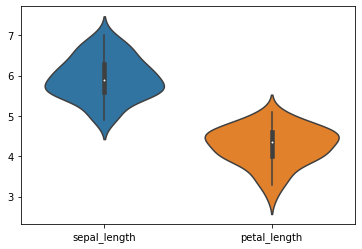

In [5]:
# 箱ひげ図を表示
sns.violinplot(data=df_virgicolor)

<AxesSubplot:>

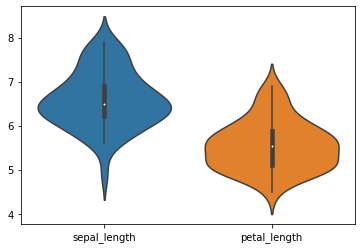

In [6]:
# 箱ひげ図を表示
sns.violinplot(data=df_virginica)

【問題3】前処理・訓練データと検証データの分割<br>
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。<br>
scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。<br>
《注意点》<br>
データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。<br>

In [7]:
# 元のデータフレームから特徴量（説明変数）のみ、正解（目的変数）のみ、となるようにデータフレームを作成し、ndarrayに変換
X = df.drop("Species", axis=1).values
y = df.drop(["sepal_length","petal_length"], axis=1).values

# train_test_splitにX、yを代入（デフォルト(指定なし)で訓練75%、検証25%となる）
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train)
print("====================================================")
print(X_test)
print("====================================================")
print(y_train)
print("====================================================")
print(y_test)
print("====================================================")

[[5.8 3.9]
 [6.  4.8]
 [6.5 5.5]
 [6.2 4.3]
 [7.4 6.1]
 [6.5 5.2]
 [6.9 5.1]
 [7.1 5.9]
 [6.3 5.6]
 [5.6 4.9]
 [7.7 6.7]
 [6.7 5.7]
 [6.5 5.8]
 [7.9 6.4]
 [4.9 3.3]
 [5.5 4. ]
 [7.7 6.1]
 [6.3 4.7]
 [6.2 4.8]
 [6.7 5.2]
 [5.7 4.1]
 [6.  4.5]
 [6.3 4.4]
 [7.7 6.7]
 [6.  5. ]
 [6.1 4.7]
 [6.3 4.9]
 [5.  3.5]
 [6.7 5.8]
 [5.5 3.8]
 [5.5 4.4]
 [6.4 5.3]
 [6.1 4.9]
 [5.6 4.1]
 [6.4 5.6]
 [5.8 4. ]
 [6.4 5.3]
 [6.9 4.9]
 [6.4 4.5]
 [6.7 5.7]
 [6.2 4.5]
 [6.3 5. ]
 [6.3 5.1]
 [5.9 4.2]
 [7.2 5.8]
 [6.9 5.4]
 [6.8 4.8]
 [5.4 4.5]
 [5.6 3.6]
 [5.7 3.5]
 [7.2 6.1]
 [5.7 4.2]
 [6.1 4.6]
 [5.7 4.5]
 [6.7 4.7]
 [5.7 4.2]
 [5.2 3.9]
 [6.8 5.5]
 [6.3 4.9]
 [6.5 5.1]
 [6.  4. ]
 [5.9 4.8]
 [5.7 5. ]
 [4.9 4.5]
 [5.8 4.1]
 [7.6 6.6]
 [6.8 5.9]
 [5.6 3.9]
 [6.5 4.6]
 [5.6 4.5]
 [6.9 5.7]
 [6.  5.1]
 [6.3 6. ]
 [5.1 3. ]
 [7.  4.7]]
[[6.1 4. ]
 [5.9 5.1]
 [6.7 5. ]
 [6.6 4.4]
 [6.7 5.6]
 [5.6 4.2]
 [6.1 5.6]
 [6.  4.5]
 [6.1 4.7]
 [5.5 4. ]
 [6.4 4.3]
 [6.3 5.6]
 [6.2 5.4]
 [6.6 4.6]
 [7.7 6.9]
 [5.8 5.1

【問題4】前処理・標準化<br>
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。<br>
標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。<br>
《注意点》<br>
標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。また、今回は分類問題なので、ラベルについては標準化させる必要はありません。<br>

In [8]:
# インスタンス化
scaler = StandardScaler()

# 訓練用のデータのみを.fitで標準化
fit_X_tarin = scaler.fit(X_train)
fit_y_train = scaler.fit(y_train)

# 訓練用、検証用双方のデータにtransformで標準化
# tr_X_tarin = scaler.transform(X_train)
tr_X_tarin = scaler.fit_transform(X_train)
tr_X_test = scaler.fit_transform(X_test)
tr_y_tarin = scaler.fit_transform(y_train)
tr_y_test = scaler.fit_transform(y_test)

print(tr_X_tarin)
print("====================================================")
print(tr_X_test)
print("====================================================")
print(tr_y_tarin)
print("====================================================")
print(tr_y_test)


[[-0.68420208 -1.20644364]
 [-0.38928739 -0.10745652]
 [ 0.34799933  0.74731124]
 [-0.0943727  -0.71800492]
 [ 1.67511543  1.47996932]
 [ 0.34799933  0.3809822 ]
 [ 0.93782871  0.25887252]
 [ 1.23274339  1.23574996]
 [ 0.05308464  0.86942092]
 [-0.97911676  0.01465316]
 [ 2.11748746  2.2126274 ]
 [ 0.64291402  0.9915306 ]
 [ 0.34799933  1.11364028]
 [ 2.41240214  1.84629836]
 [-2.01131817 -1.93910172]
 [-1.12657411 -1.08433396]
 [ 2.11748746  1.47996932]
 [ 0.05308464 -0.2295662 ]
 [-0.0943727  -0.10745652]
 [ 0.64291402  0.3809822 ]
 [-0.83165942 -0.96222428]
 [-0.38928739 -0.47378556]
 [ 0.05308464 -0.59589524]
 [ 2.11748746  2.2126274 ]
 [-0.38928739  0.13676284]
 [-0.24183004 -0.2295662 ]
 [ 0.05308464  0.01465316]
 [-1.86386083 -1.69488236]
 [ 0.64291402  1.11364028]
 [-1.12657411 -1.32855332]
 [-1.12657411 -0.59589524]
 [ 0.20054199  0.50309188]
 [-0.24183004  0.01465316]
 [-0.97911676 -0.96222428]
 [ 0.20054199  0.86942092]
 [-0.68420208 -1.08433396]
 [ 0.20054199  0.50309188]
 

【問題5】学習と推定<br>
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。
<br>
学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。<br>
パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。<br>

In [9]:
# 「y_tain」を警告文がでないようにreshape　※なぜ必要なのか不明！
y_train = y_train.reshape(75,)

# k-近傍法（k=3）
knn = KNeighborsClassifier(n_neighbors=3)
# 学習
knn.fit(X_train,y_train)
# 学習したデータに検証用データを入力
Y_pred = knn.predict(X_test)

# 正解データと比較
print("========== ■ 3-nn ■ ==========")
print(Y_pred) # 正解データ
print(y_test.reshape(25,)) # 出力された予測データ

========== ■ 3-nn ■ ==========
[1 2 2 1 2 1 2 1 1 1 1 2 2 1 2 2 2 2 2 1 2 1 2 1 2]
[1 2 1 1 2 1 2 1 1 1 1 2 2 1 2 2 2 2 2 1 2 1 2 1 2]


In [10]:
# k-近傍法（k=5）
knn = KNeighborsClassifier(n_neighbors=5)
# 学習
knn.fit(X_train,y_train)
# 学習したデータに検証用データを入力
Y_pred = knn.predict(X_test)

# 正解データと比較
print("========== ■ 5-nn ■ ==========")
print(Y_pred) # 正解データ
print(y_test.reshape(25,)) # 出力された予測データ

========== ■ 5-nn ■ ==========
[1 2 2 1 2 1 2 1 1 1 1 2 2 1 2 2 2 2 2 1 2 1 2 1 2]
[1 2 1 1 2 1 2 1 1 1 1 2 2 1 2 2 2 2 2 1 2 1 2 1 2]


In [11]:
# k-近傍法（k=1）
knn = KNeighborsClassifier(n_neighbors=1)
# 学習
knn.fit(X_train,y_train)
# 学習したデータに検証用データを入力
Y_pred = knn.predict(X_test)

# 正解データと比較
print("========== ■ 1-nn ■ ==========")
print(Y_pred) # 正解データ
print(y_test.reshape(25,)) # 出力された予測データ

========== ■ 1-nn ■ ==========
[1 1 2 1 2 1 2 1 1 1 1 2 2 1 2 2 2 2 2 1 2 1 2 1 2]
[1 2 1 1 2 1 2 1 1 1 1 2 2 1 2 2 2 2 2 1 2 1 2 1 2]


【問題6】評価<br>
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。<br>
<br>
2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。<br>
<br>
　① scikit-learnを使い4種類の指標を計算する<br>
　② 混同行列をscikit-learnを使い表示する<br>
　③ 4種類の指標値の意味について簡単に調査して文章でまとめる<br>

In [12]:
print("① scikit-learnを使い4種類の指標を計算する")
print("　　accuracy_score:{}".format(accuracy_score(y_test, Y_pred, normalize=False)))
print("　　precision_score:{}".format(precision_score(y_test, Y_pred, average='macro')))
print("　　recall_score:{}".format(recall_score(y_test, Y_pred, average='macro')))
print("　　f1_score:{}".format(f1_score(y_test, Y_pred, average='macro')))

① scikit-learnを使い4種類の指標を計算する
　　accuracy_score:23
　　precision_score:0.9198717948717949
　　recall_score:0.9198717948717949
　　f1_score:0.9198717948717949


In [13]:
print("② 混同行列をscikit-learnを使い表示する")
print("confusion_matrix:")
print(confusion_matrix(y_test, Y_pred))

② 混同行列をscikit-learnを使い表示する
confusion_matrix:
[[11  1]
 [ 1 12]]


In [14]:
print("③ 4種類の指標値の意味について簡単に調査して文章でまとめる")

③ 4種類の指標値の意味について簡単に調査して文章でまとめる


　・Accuracy（正解率）：全ての予測のうち、正解した予測の割合。<br>
　・Precision（適合率）：陽性と予測したもののうち、実際に陽性であるものの割合。<br>
　・Recall（再現率）：実際に正であるもののうち、正であると予測されたものの割合。<br>
　・F値：適合率と再現率の調和平均。<br>

【問題7】可視化<br>
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。<br>

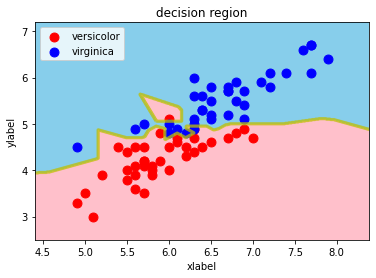

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region(X_train, y_train, knn)

【問題8】他の手法の学習<br>
以下のすべての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。<br>
　・最近傍法<br>
　・ロジスティック回帰<br>
　・SVM<br>
　・決定木<br>
　・ランダムフォレスト<br>

========== 最近傍法 ==========
accuracy_score:24
precision_score:0.9642857142857143
recall_score:0.9583333333333333
f1_score:0.9597423510466989


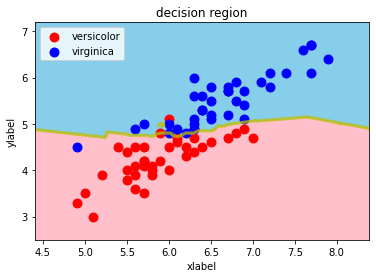

In [16]:
print("========== 最近傍法 ==========")
# 「y_tain」を警告文がでないようにreshape　※なぜ必要なのか不明！
y_train = y_train.reshape(75,)

# k-近傍法（k=3）
knn = KNeighborsClassifier(n_neighbors=3)
# 学習
knn.fit(X_train,y_train)
# 推定
Y_pred = knn.predict(X_test)
# 評価
print("accuracy_score:{}".format(accuracy_score(y_test, Y_pred, normalize=False)))
print("precision_score:{}".format(precision_score(y_test, Y_pred, average='macro')))
print("recall_score:{}".format(recall_score(y_test, Y_pred, average='macro')))
print("f1_score:{}".format(f1_score(y_test, Y_pred, average='macro')))
# 可視化
decision_region(X_train, y_train, knn)


========== ロジスティック回帰 ==========
accuracy_score:24
precision_score:0.9642857142857143
recall_score:0.9583333333333333
f1_score:0.9597423510466989


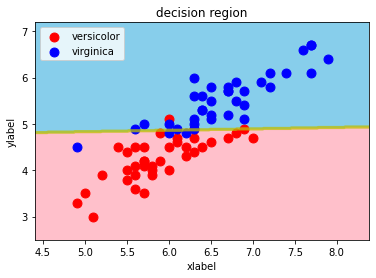

In [17]:
print("========== ロジスティック回帰 ==========")
# 「y_tain」を警告文がでないようにreshape　※なぜ必要なのか不明！
y_train = y_train.reshape(75,)

# 学習
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
# 推定
Y_pred = clf.predict(X_test)
# 評価
print("accuracy_score:{}".format(accuracy_score(y_test, Y_pred, normalize=False)))
print("precision_score:{}".format(precision_score(y_test, Y_pred, average='macro')))
print("recall_score:{}".format(recall_score(y_test, Y_pred, average='macro')))
print("f1_score:{}".format(f1_score(y_test, Y_pred, average='macro')))
# 可視化
decision_region(X_train, y_train, clf)


========== SVM ==========
accuracy_score:24
precision_score:0.9642857142857143
recall_score:0.9583333333333333
f1_score:0.9597423510466989


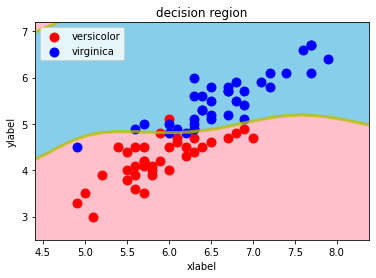

In [18]:
print("========== SVM ==========")
# 「y_tain」を警告文がでないようにreshape　※なぜ必要なのか不明！
y_train = y_train.reshape(75,)

# 学習
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train,y_train)
# 推定
Y_pred = clf.predict(X_test)
# 評価
print("accuracy_score:{}".format(accuracy_score(y_test, Y_pred, normalize=False)))
print("precision_score:{}".format(precision_score(y_test, Y_pred, average='macro')))
print("recall_score:{}".format(recall_score(y_test, Y_pred, average='macro')))
print("f1_score:{}".format(f1_score(y_test, Y_pred, average='macro')))
# 可視化
decision_region(X_train, y_train, clf)


========== 決定木 ==========
accuracy_score:19
precision_score:0.7881944444444444
recall_score:0.766025641025641
f1_score:0.7564935064935066


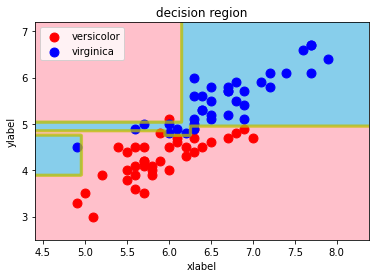

In [22]:
print("========== 決定木 ==========")
# 「y_tain」を警告文がでないようにreshape　※なぜ必要なのか不明！
y_train = y_train.reshape(75,)

# 学習
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
score = cross_val_score(clf, X_train, y_train, cv=10)
# 推定
Y_pred = clf.predict(X_test)
# 評価
print("accuracy_score:{}".format(accuracy_score(y_test, Y_pred, normalize=False)))
print("precision_score:{}".format(precision_score(y_test, Y_pred, average='macro')))
print("recall_score:{}".format(recall_score(y_test, Y_pred, average='macro')))
print("f1_score:{}".format(f1_score(y_test, Y_pred, average='macro')))
# 可視化
decision_region(X_train, y_train, clf)


========== ランダムフォレスト ==========
accuracy_score:24
precision_score:0.9642857142857143
recall_score:0.9583333333333333
f1_score:0.9597423510466989


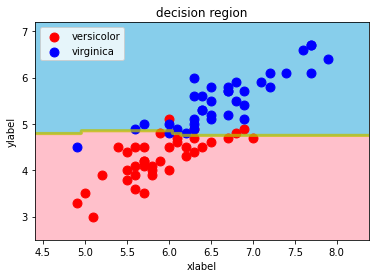

In [23]:
print("========== ランダムフォレスト ==========")
# 「y_tain」を警告文がでないようにreshape　※なぜ必要なのか不明！
y_train = y_train.reshape(75,)

# 学習
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
# 推定
Y_pred = clf.predict(X_test)
# 評価
print("accuracy_score:{}".format(accuracy_score(y_test, Y_pred, normalize=False)))
print("precision_score:{}".format(precision_score(y_test, Y_pred, average='macro')))
print("recall_score:{}".format(recall_score(y_test, Y_pred, average='macro')))
print("f1_score:{}".format(f1_score(y_test, Y_pred, average='macro')))
# 可視化
decision_region(X_train, y_train, clf)

|                    | Accuracy(正解率) | Precision(適合率) | Recall(再現率)    | F値               |
|-|-|-|-|-|
| 最近傍法           | 24               | 0.964285714285714 | 0.958333333333333 | 0.959742351046698 |
| ロジスティック回帰 | 24               | 0.964285714285714 | 0.958333333333333 | 0.959742351046698 |
| SVM                | 24               | 0.964285714285714 | 0.958333333333333 | 0.959742351046698 |
| 決定木             | 19               | 0.788194444444444 | 0.766025641025641 | 0.756493506493506 |
| ランダムフォレスト | 24               | 0.964285714285714 | 0.958333333333333 | 0.959742351046698 |

<< 考察 >>
今回のデータでは、決定木以外はほぼ同様の結果となった。
どの手法がどういったデータを扱うときにより良い精度が出せるのか、を知ることは作業を効率的に進めるうえで非常に有用になると思われる。